In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [3]:
import numpy as np

In [4]:
import utils

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tqdm.keras import TqdmCallback

In [6]:
# generate fake data

In [34]:
def gen_data(npts=1000):
    x = np.linspace(0, 1, npts)
    y = x + x**2 * np.sin(x * 2 * np.pi / 0.5)
    return x.reshape(-1,1), y.reshape(-1,1)

In [103]:
X, y = gen_data(npts=1000)

In [104]:
X.shape

(1000, 1)

In [105]:
y.shape

(1000, 1)

Text(0.5, 1.0, 'the data')

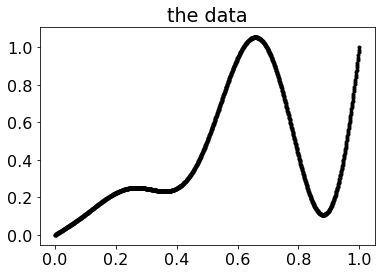

In [117]:
plt.figure()
plt.plot(X, y, 'k.-')
plt.title('the data')

In [118]:
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_36 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_37 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_38 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


In [119]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [120]:
model.compile(loss='mse', optimizer=opt)

In [ ]:
callbacks=[TqdmCallback(verbose=1)]

In [121]:
history = model.fit(X, y, epochs=200)

Train on 1000 samples
Epoch 1/200
1000/1000 [==============================] - 0s 260us/sample - loss: 0.1172
Epoch 2/200
1000/1000 [==============================] - 0s 35us/sample - loss: 0.0705
Epoch 3/200
1000/1000 [==============================] - 0s 35us/sample - loss: 0.0672
Epoch 4/200
1000/1000 [==============================] - 0s 34us/sample - loss: 0.0641
Epoch 5/200
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0598
Epoch 6/200
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0532
Epoch 7/200
1000/1000 [==============================] - 0s 34us/sample - loss: 0.0436
Epoch 8/200
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0320
Epoch 9/200
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0219
Epoch 10/200
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0201
Epoch 11/200
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0186
Epoch 12/200
1000/

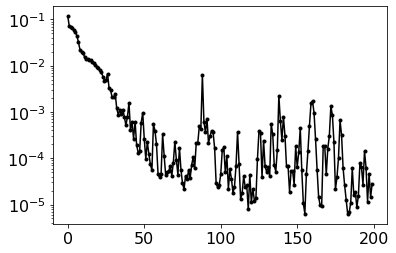

In [126]:
plt.figure()
plt.plot(history.history['loss'], 'k.-')
plt.yscale('log')

In [127]:
yhat = model.predict(X)

Text(0.5, 1.0, 'the data')

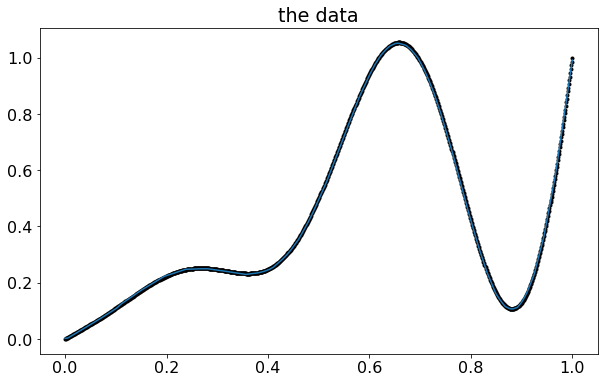

In [128]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'k.')
plt.plot(X, yhat, 'C0-')

plt.title('the data')

Text(0.5, 1.0, 'residual')

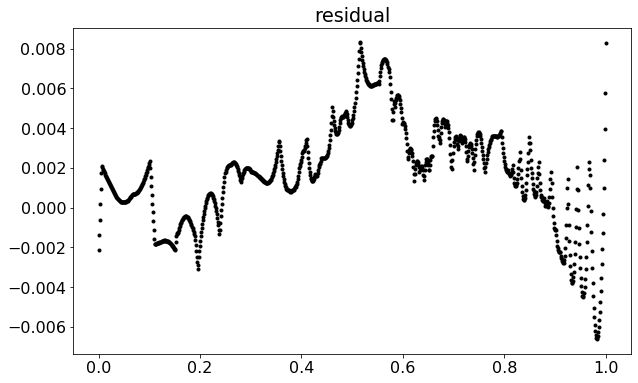

In [129]:
plt.figure(figsize=(10,6))
plt.plot(X, y-yhat, 'k.')
plt.title('residual')